In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('C:/Deepthi_Personal/DataAnalytics 2/Python/Conflict/Palestine Body Count.csv')
df.head()

Year      Month Palestinians Injuries Israelis Injuries  \
0  2000.0   DECEMBER                   781               NaN   
1  2000.0   NOVEMBER                  3838               NaN   
2  2000.0    OCTOBER                  5984               NaN   
3  2000.0  SEPTEMBER                   NaN               NaN   
4  2001.0   DECEMBER                   304               NaN   

  Palestinians Killed Israelis Killed  
0                  51               8  
1                 112              22  
2                 104              10  
3                  16               1  
4                  67              36

In [5]:
df.tail()

Year  Month Palestinians Injuries Israelis Injuries  \
246  2021.0  MARCH                   NaN               NaN   
247  2021.0  APRIL                   NaN               NaN   
248  2021.0    MAY                   NaN               NaN   
249     NaN    NaN                   NaN               NaN   
250     NaN    NaN               111,475             5,160   

    Palestinians Killed Israelis Killed  
246                   4               0  
247                   1               0  
248                  26               3  
249                 NaN             NaN  
250              10,000           1,275

In [6]:
df.shape

(251, 6)

In [7]:
df.columns

Index(['Year', 'Month', 'Palestinians Injuries', 'Israelis Injuries',
       'Palestinians Killed', 'Israelis Killed'],
      dtype='object')

In [9]:
df.duplicated().sum()

0

In [15]:
df.isnull().sum()

Year                     0
Month                    0
Palestinians Injuries    0
Israelis Injuries        0
Palestinians Killed      0
Israelis Killed          0
dtype: int64

In [12]:
df.dropna(subset=['Year','Month'],inplace=True)

In [14]:
df=df.fillna({'Palestinians Injuries' : '0',
          'Israelis Injuries':'0'})

In [27]:
numerical_columns=['Palestinians Injuries','Israelis Injuries','Palestinians Killed','Israelis Killed']
df[numerical_columns]=df[numerical_columns].replace({'incl. Aug':0},regex=True)
df[numerical_columns]=df[numerical_columns].replace({'incl. Jun': 0},regex=True)
df[numerical_columns]=df[numerical_columns].apply(pd.to_numeric,errors='coerce')

In [30]:
df

Year      Month  Palestinians Injuries  Israelis Injuries  \
0    2000.0   DECEMBER                  781.0                0.0   
1    2000.0   NOVEMBER                 3838.0                0.0   
2    2000.0    OCTOBER                 5984.0                0.0   
3    2000.0  SEPTEMBER                    0.0                0.0   
4    2001.0   DECEMBER                  304.0                0.0   
..      ...        ...                    ...                ...   
244  2021.0    JANUARY                    0.0                0.0   
245  2021.0   FEBRUARY                    0.0                0.0   
246  2021.0      MARCH                    0.0                0.0   
247  2021.0      APRIL                    0.0                0.0   
248  2021.0        MAY                    0.0                0.0   

     Palestinians Killed  Israelis Killed  
0                     51                8  
1                    112               22  
2                    104               10  
3                     16                1  
4                     67               36  
..                   ...              ...  
244                    4                0  
245                    1                0  
246                    4                0  
247                    1                0  
248                   26                3  

[249 rows x 6 columns]

In [32]:
df['Year']=df['Year'].astype(int)

In [33]:
df.dtypes

Year                       int32
Month                     object
Palestinians Injuries    float64
Israelis Injuries        float64
Palestinians Killed        int64
Israelis Killed            int64
dtype: object

In [34]:
df

Year      Month  Palestinians Injuries  Israelis Injuries  \
0    2000   DECEMBER                  781.0                0.0   
1    2000   NOVEMBER                 3838.0                0.0   
2    2000    OCTOBER                 5984.0                0.0   
3    2000  SEPTEMBER                    0.0                0.0   
4    2001   DECEMBER                  304.0                0.0   
..    ...        ...                    ...                ...   
244  2021    JANUARY                    0.0                0.0   
245  2021   FEBRUARY                    0.0                0.0   
246  2021      MARCH                    0.0                0.0   
247  2021      APRIL                    0.0                0.0   
248  2021        MAY                    0.0                0.0   

     Palestinians Killed  Israelis Killed  
0                     51                8  
1                    112               22  
2                    104               10  
3                     16                1  
4                     67               36  
..                   ...              ...  
244                    4                0  
245                    1                0  
246                    4                0  
247                    1                0  
248                   26                3  

[249 rows x 6 columns]

In [35]:
df.describe()

Year  Palestinians Injuries  Israelis Injuries  \
count   249.000000             247.000000         247.000000   
mean   2010.542169             451.315789          20.890688   
std       6.014702            1471.798713         150.387900   
min    2000.000000               0.000000           0.000000   
25%    2005.000000              61.500000           0.000000   
50%    2011.000000             161.000000           3.000000   
75%    2016.000000             302.500000          15.000000   
max    2021.000000           13735.000000        2347.000000   

       Palestinians Killed  Israelis Killed  
count           249.000000       249.000000  
mean             40.160643         5.120482  
std             129.148851        11.653323  
min               0.000000         0.000000  
25%               4.000000         0.000000  
50%              12.000000         1.000000  
75%              37.000000         5.000000  
max            1590.000000       122.000000

In [36]:
df.nunique()

Year                      22
Month                     14
Palestinians Injuries    169
Israelis Injuries         53
Palestinians Killed       77
Israelis Killed           33
dtype: int64

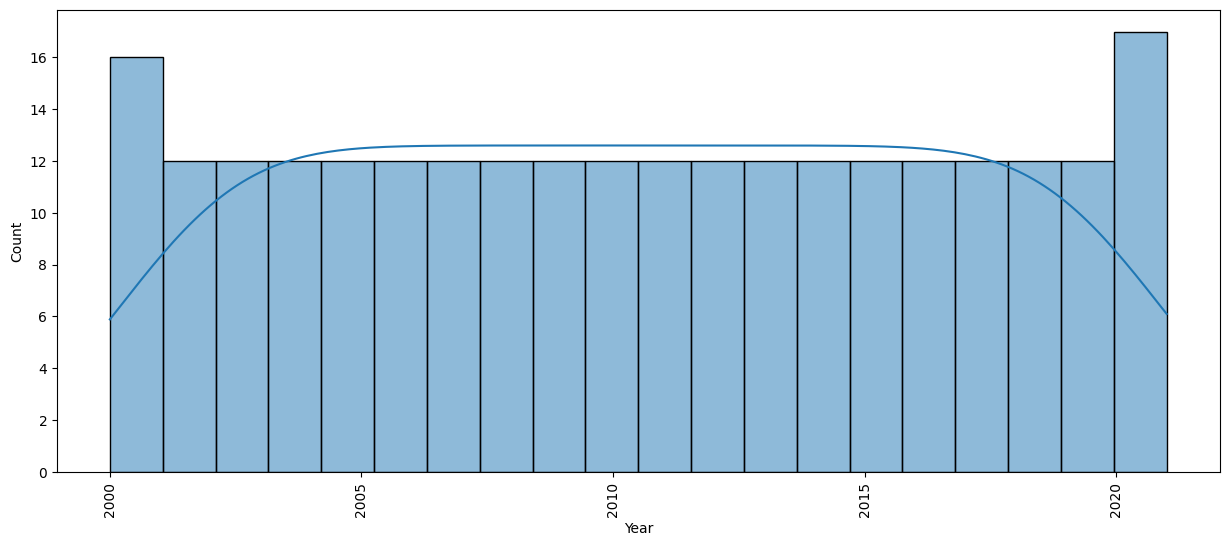

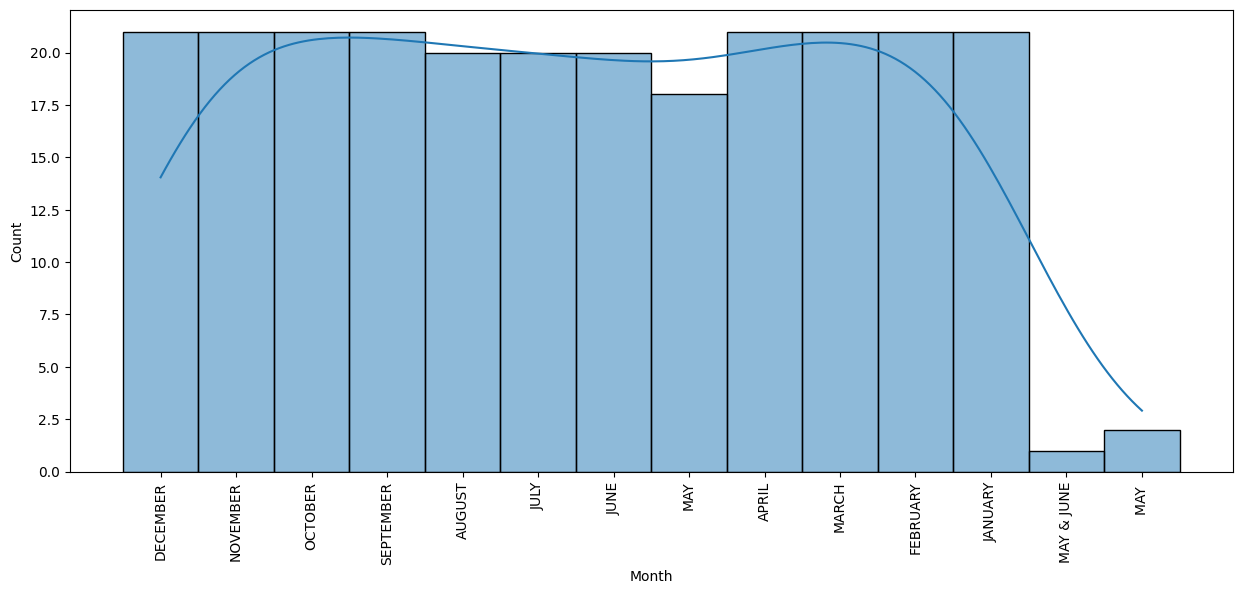

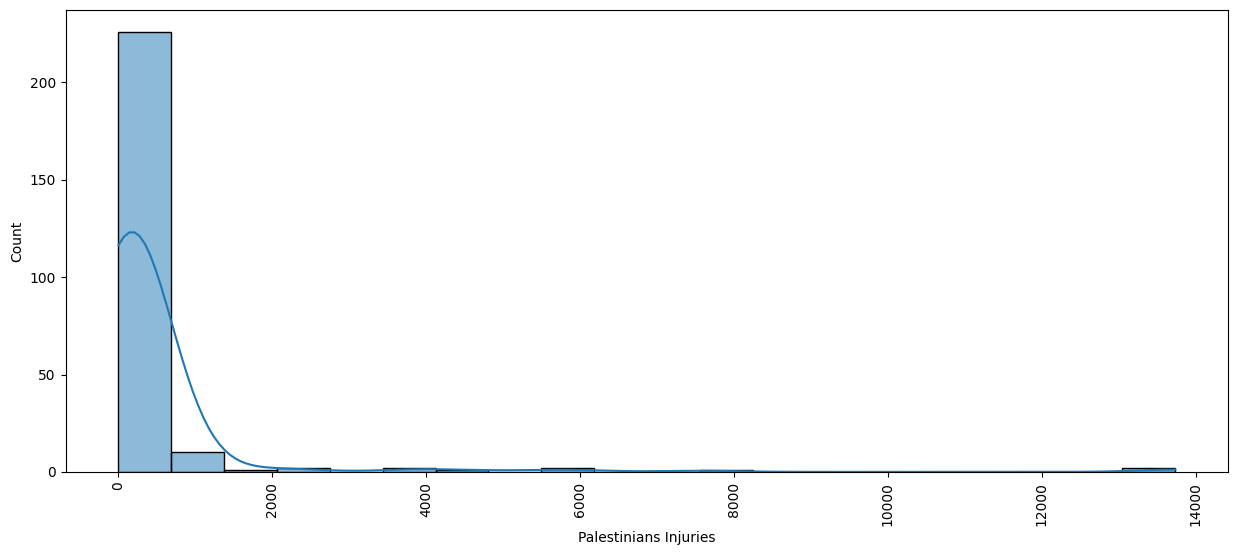

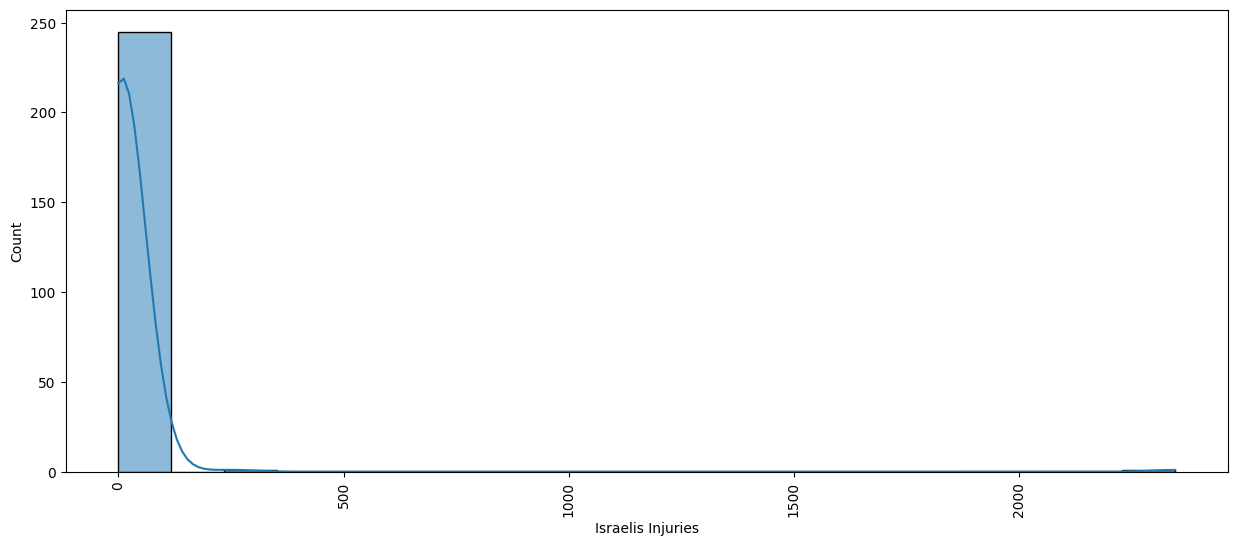

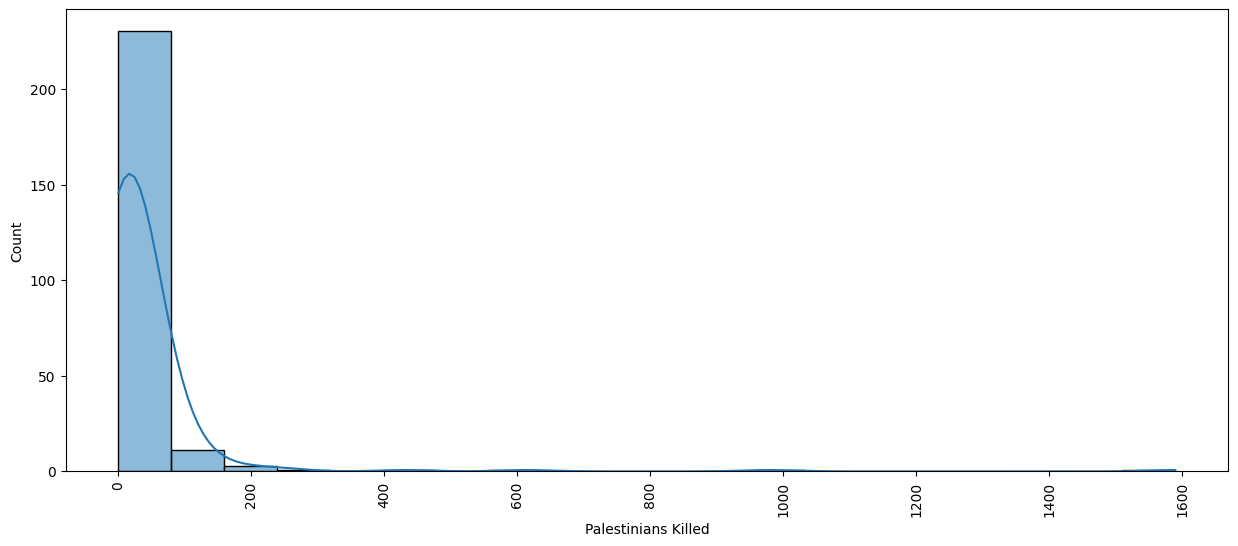

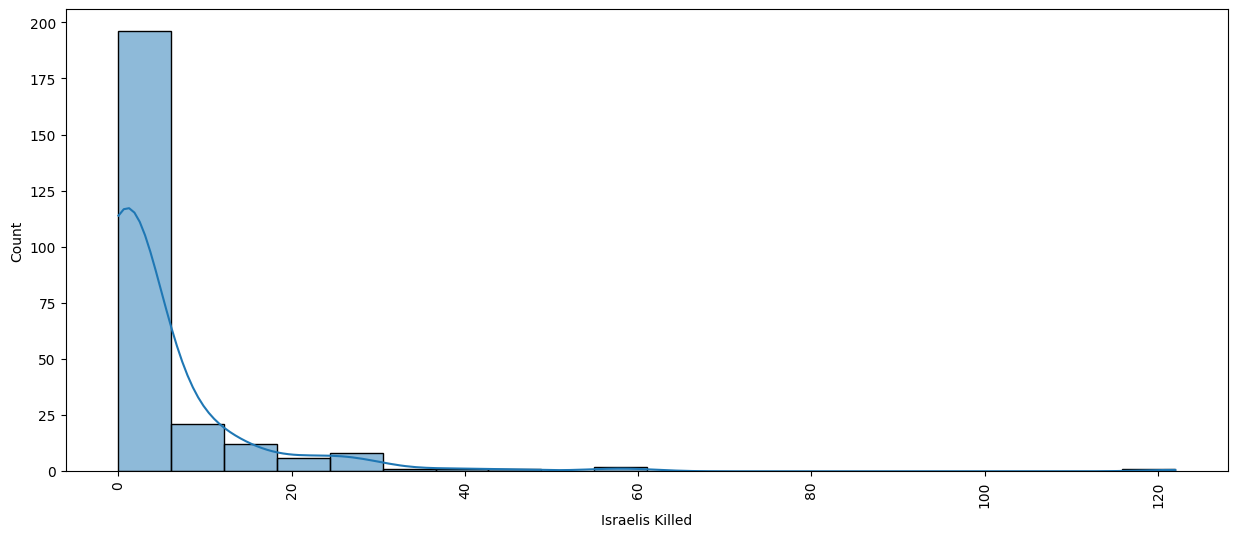

In [37]:
for i in df.columns:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i],kde=True,bins=20,palette='hls')
    plt.xticks(rotation=90)
    plt.show()

In [40]:
df1=df[['Year','Palestinians Injuries','Israelis Injuries','Palestinians Killed','Israelis Killed']]

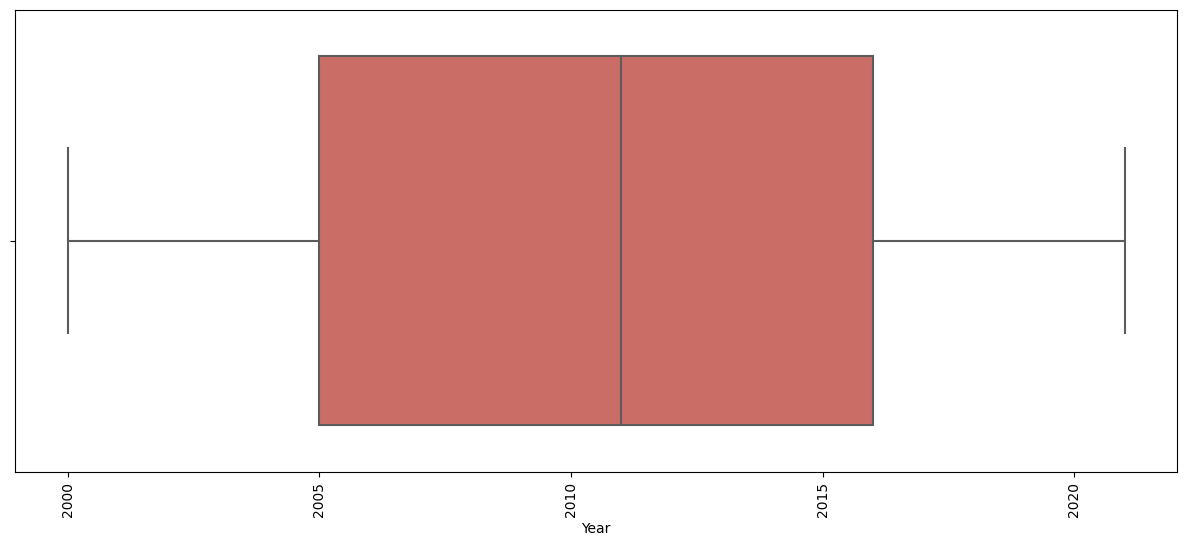

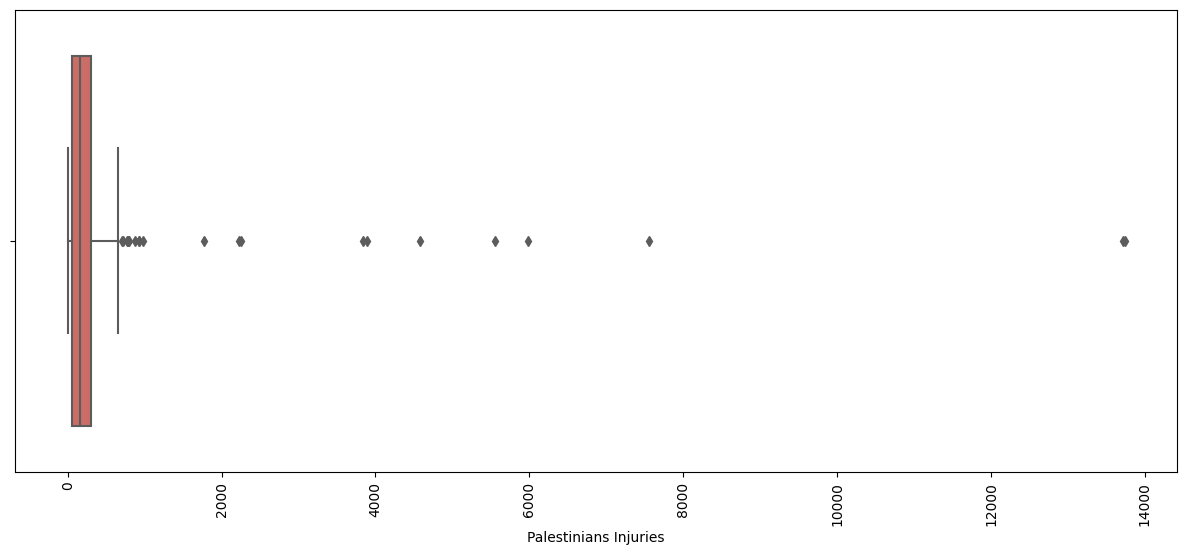

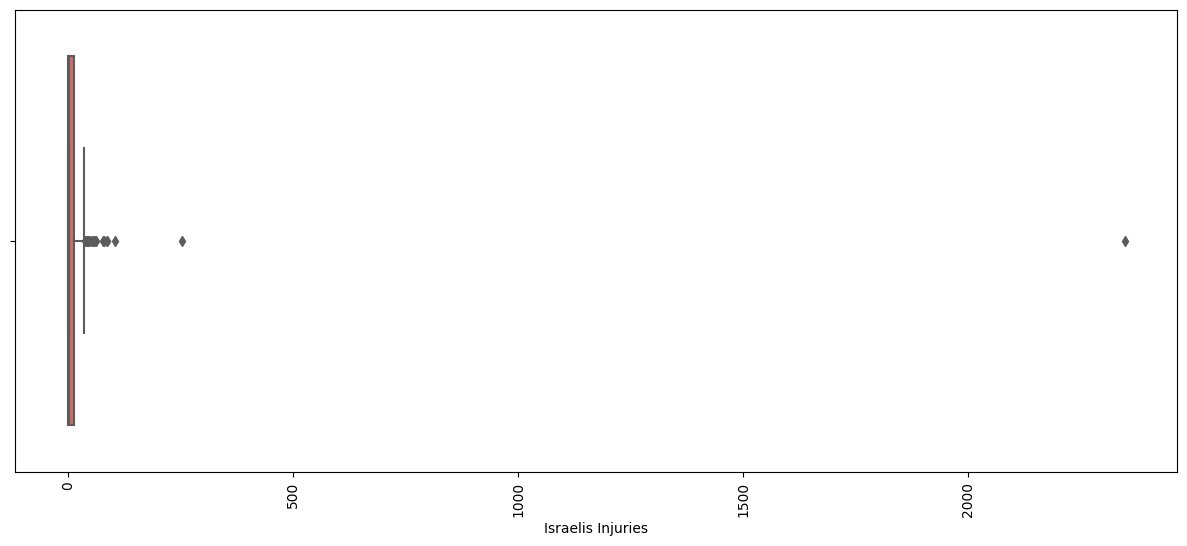

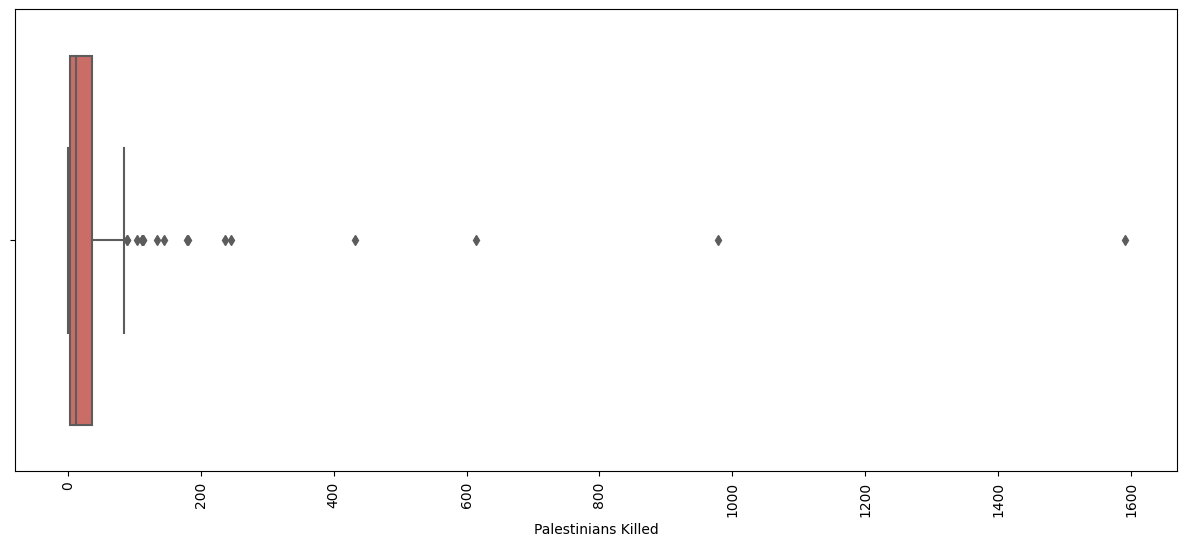

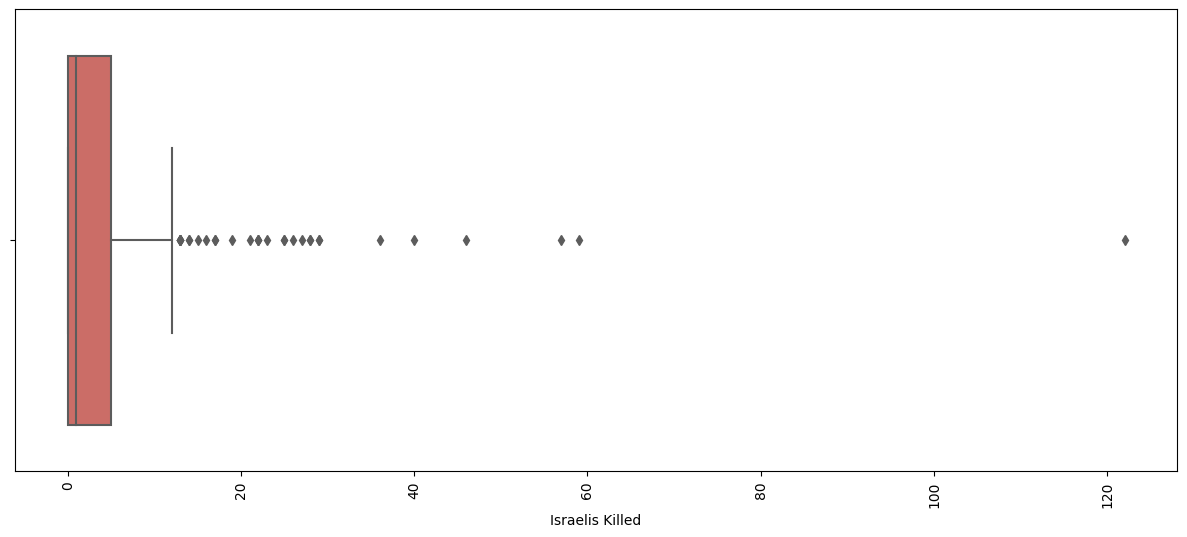

In [43]:
for i in df1.columns:
    plt.figure(figsize=(15,6))
    sns.boxplot(x=df1[i],data=df,palette='hls')
    plt.xticks(rotation=90)
    plt.show()
    

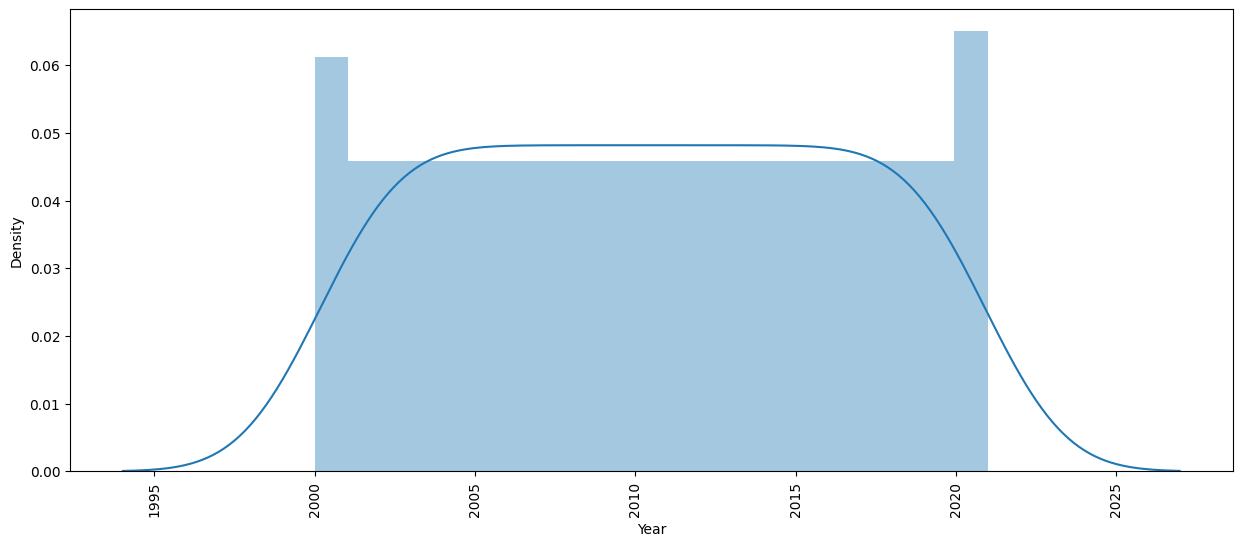

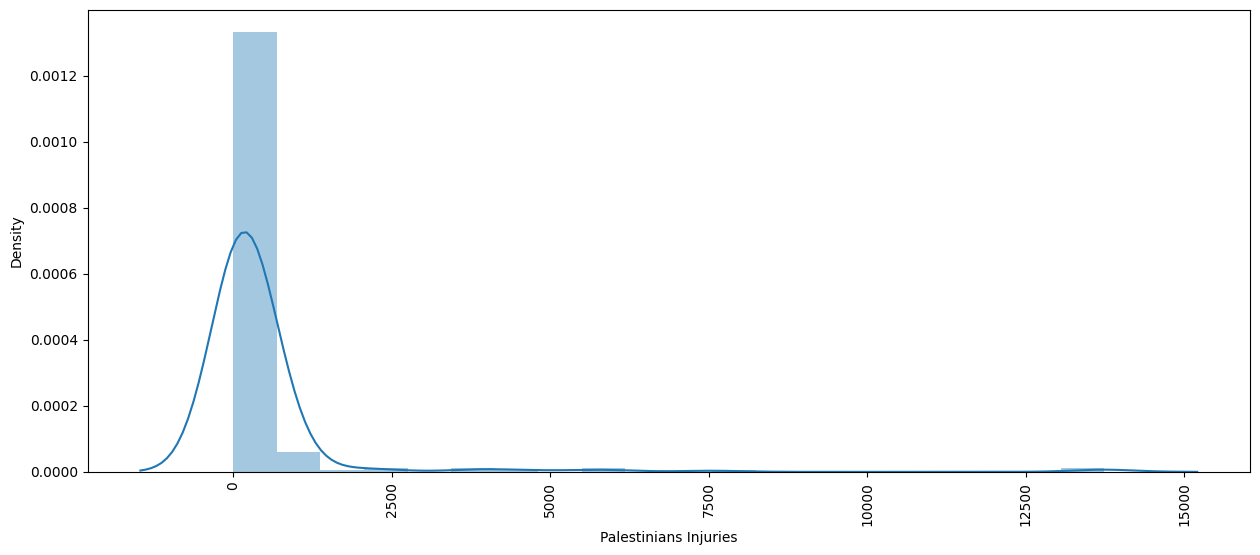

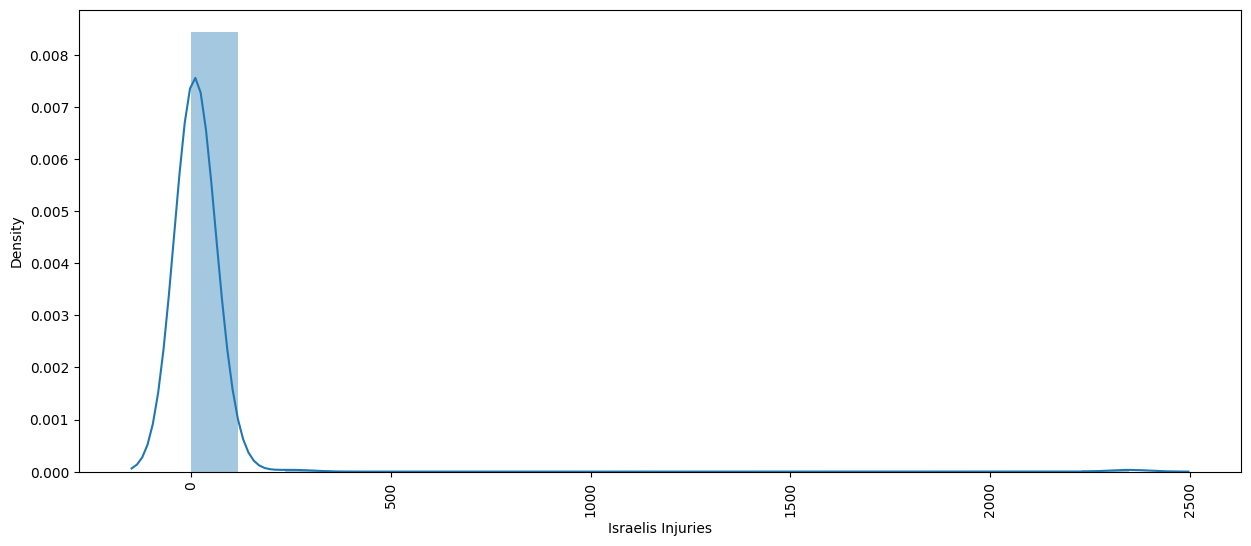

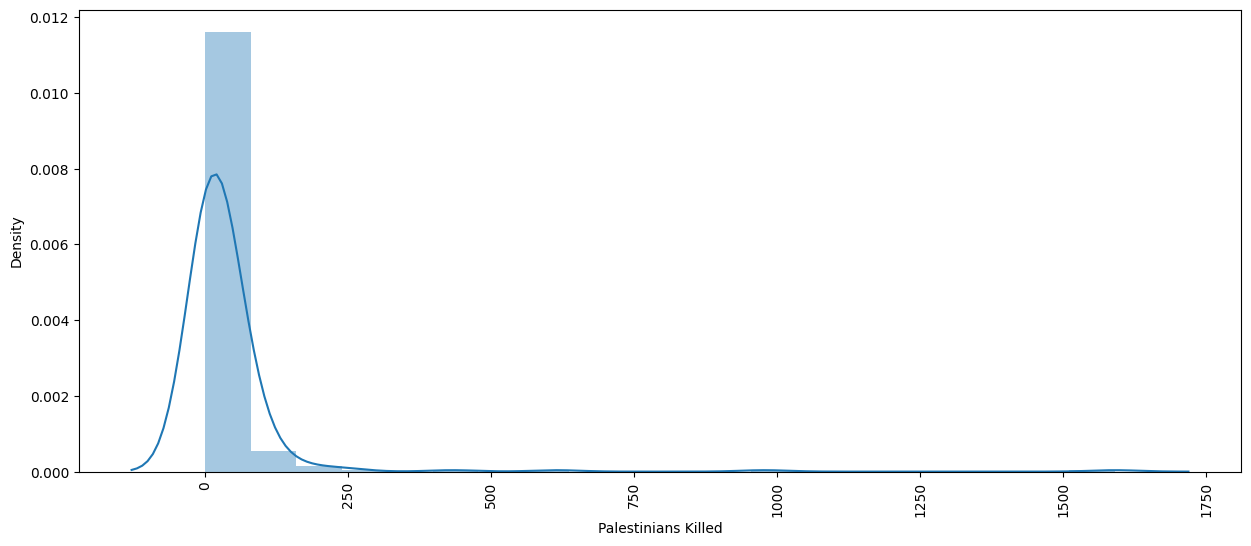

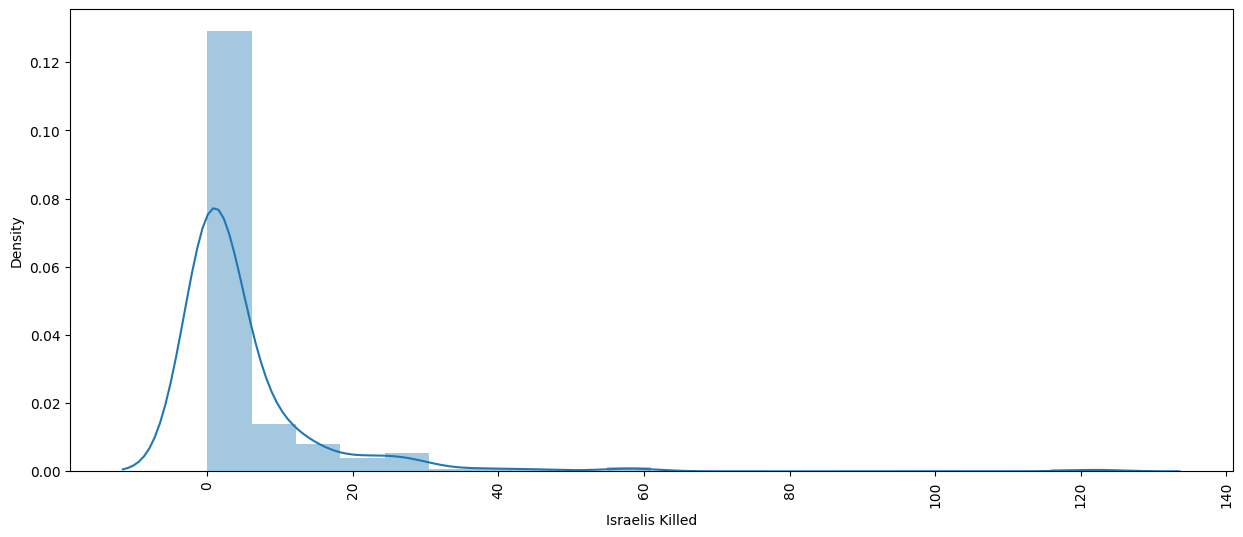

In [44]:
for i in df1.columns:
    plt.figure(figsize=(15,6))
    sns.distplot(df1[i],kde=True,bins=20)
    plt.xticks(rotation=90)
    plt.show()

In [60]:

import plotly.express as px

pk=df1[{'Palestinians Killed','Year'}]

fig=px.pie(pk,values='Palestinians Killed',color='Year',names='Year',labels='Year',width=800,height=600,hole=0.2)

fig.show()
        

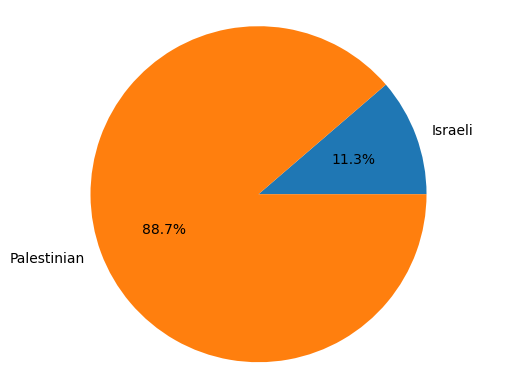

In [63]:
lis=[df1['Israelis Killed'].sum(),df1['Palestinians Killed'].sum()]
lab=['Israeli','Palestinian']
plt.pie(lis,labels=lab,autopct='%1.1f%%')
plt.axis('equal')
plt.show()

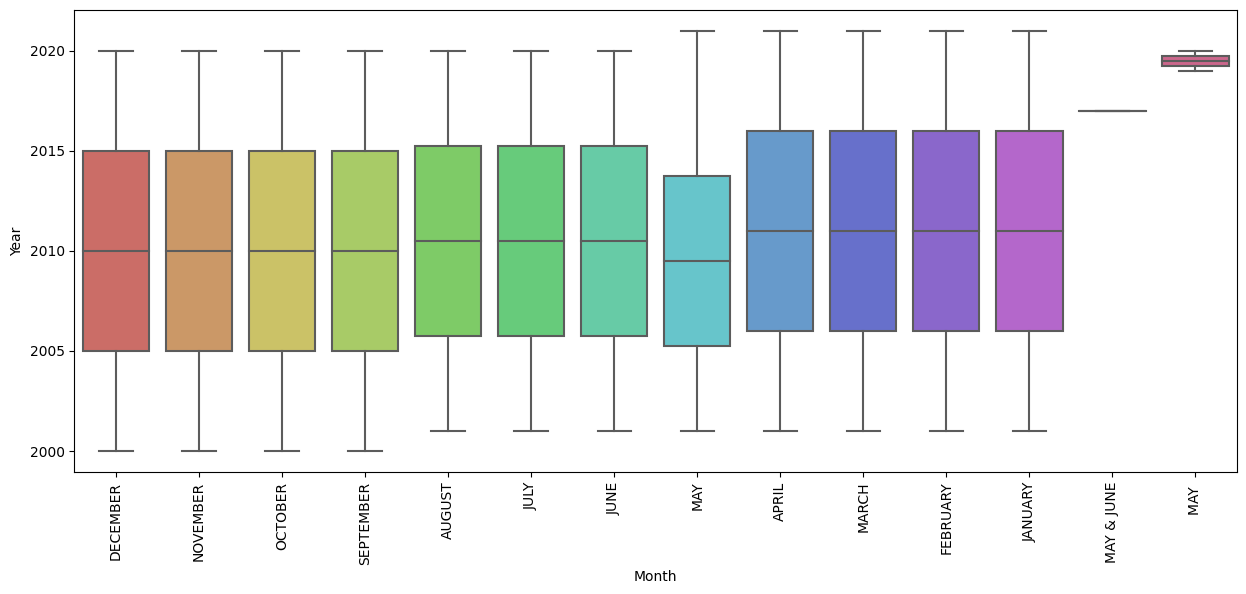

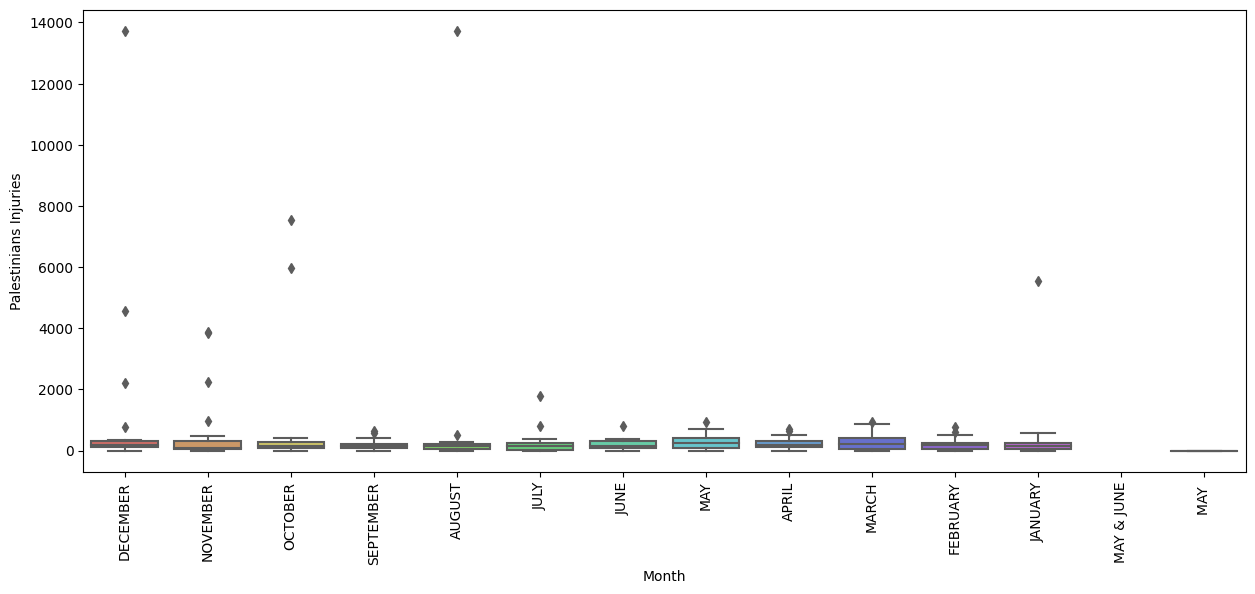

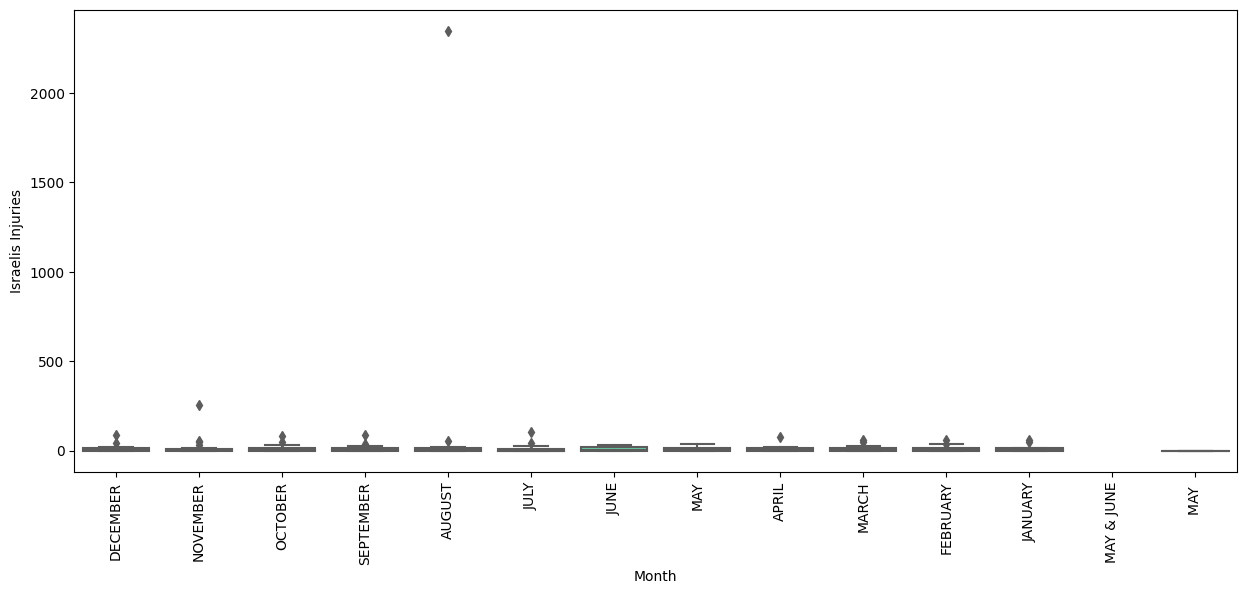

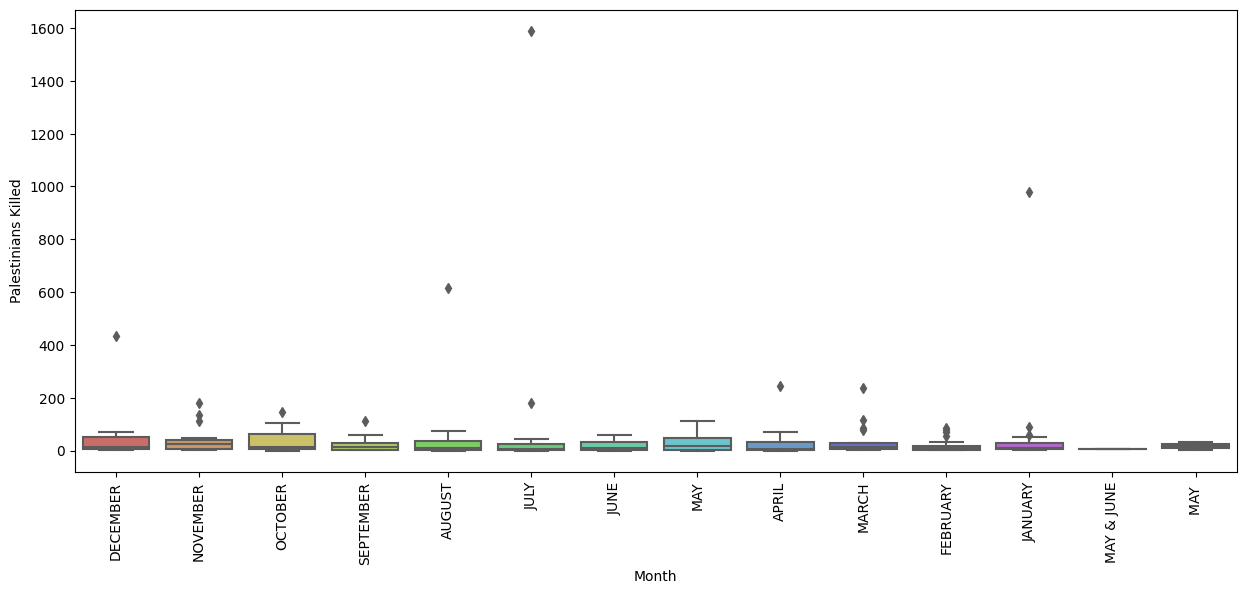

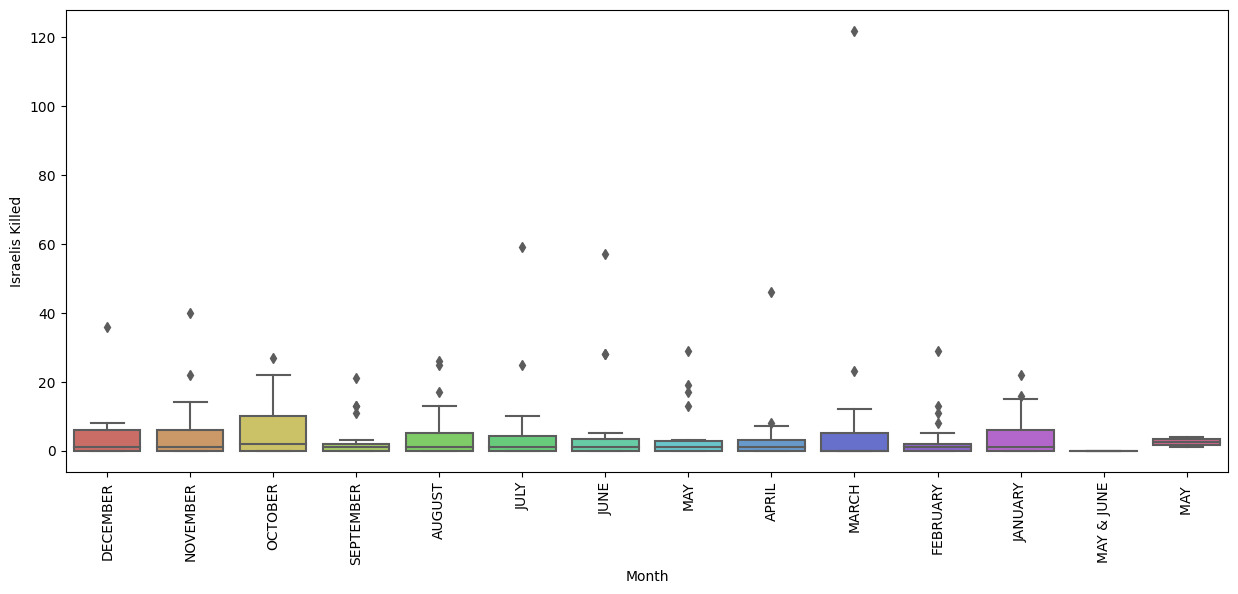

In [65]:
for i in df1.columns:
    plt.figure(figsize=(15,6))
    sns.boxplot(x=df['Month'],y=df1[i],data=df1,palette='hls')
    plt.xticks(rotation=90)
    plt.show()
    
    

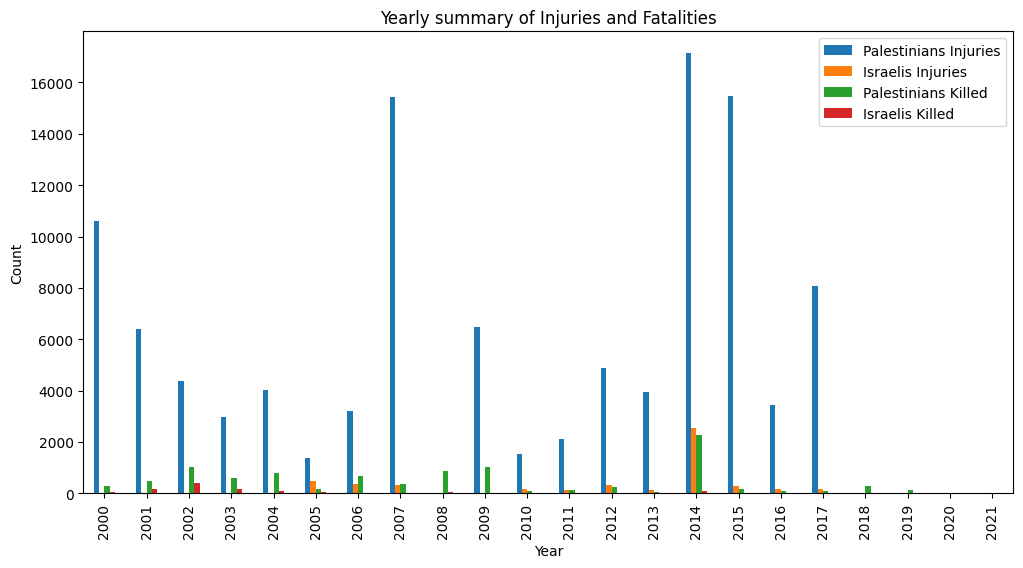

In [78]:
yearly_summary=df.groupby('Year')[['Palestinians Injuries','Israelis Injuries','Palestinians Killed','Israelis Killed']]
yearly_aggregated=yearly_summary.sum()
yearly_aggregated.plot(kind='bar',figsize=(12,6),title='Yearly summary of Injuries and Fatalities')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

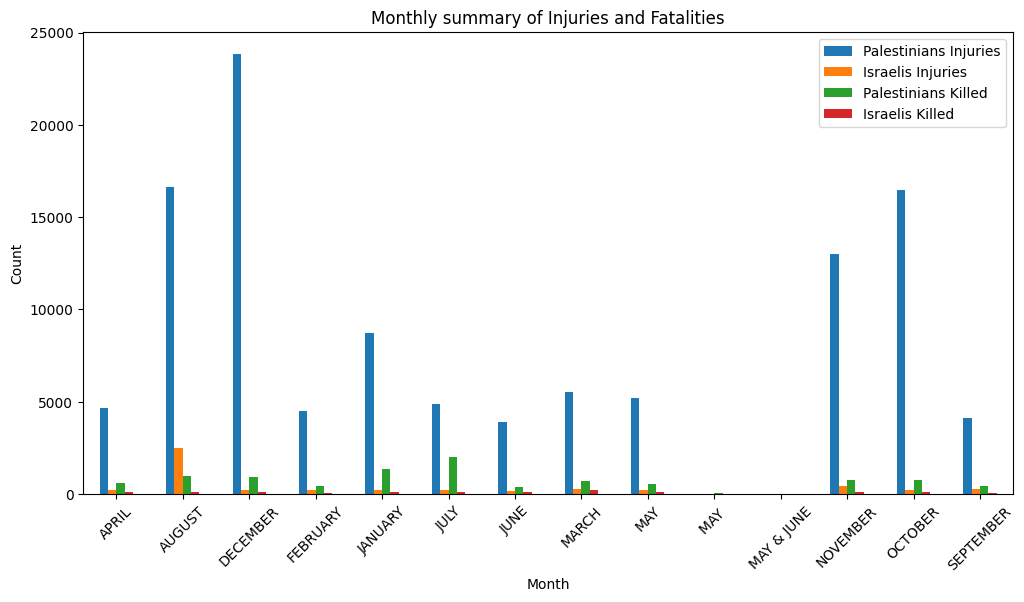

In [77]:
monthly_summary=df.groupby('Month')[['Palestinians Injuries','Israelis Injuries','Palestinians Killed','Israelis Killed']]
monthly_aggregated=monthly_summary.sum()
ax=monthly_aggregated.plot(kind='bar',figsize=(12,6),title='Monthly summary of Injuries and Fatalities')
ax.set_xticks(range(len(monthly_aggregated.index)))
ax.set_xticklabels(monthly_aggregated.index,rotation=45)
ax.set_ylabel('Count')
plt.show()